<a href="https://colab.research.google.com/github/ZinnurovArtur/Colour-Match/blob/main/Outfit_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import random
from collections import Counter
from tensorflow.keras.models import load_model



import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam

import os
%matplotlib inline

In [ ]:

from google.colab import drive
from keras.datasets import fashion_mnist

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


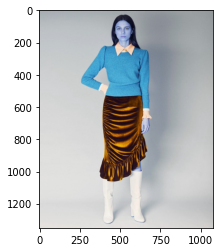

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/datasets/pictures_outfit/bauman/bauman-yeallow.jpg')

plt.imshow(image)

In [ ]:
path = "/content/drive/MyDrive/datasetTemp/"

In [ ]:

originals = []
images_toget = []

mean = np.zeros((224,224,3))
number_ofim = 0



for filename in os.listdir(path+"original2/"):
  if (filename.endswith("png")):
      number_ofim +=1
      print(filename)
      original = cv2.imread(path+"original2/"+ filename)
      original = cv2.resize(original,(224,224))
      originals.append(original)

      mean[:,:,0]=mean[:,:,0]+original[:,:,0]
      mean[:,:,1]=mean[:,:,1]+original[:,:,1]
      mean[:,:,2]=mean[:,:,2]+original[:,:,2]

for filename in os.listdir(path+"original/"):
  if (filename.endswith("png")):
      number_ofim +=1
      print(filename)
      original = cv2.imread(path+"original/"+ filename)
      original = cv2.resize(original,(224,224))
      originals.append(original)

      mean[:,:,0]=mean[:,:,0]+original[:,:,0]
      mean[:,:,1]=mean[:,:,1]+original[:,:,1]
      mean[:,:,2]=mean[:,:,2]+original[:,:,2]



arrDress = []
arrBody = []
for filename in os.listdir(path+"body2/"):
  if filename.endswith("png"):
    body = path+"body2/"+filename
    arrBody.append(body)

for filename in os.listdir(path+"dress2/"):
  if filename.endswith("png"):
    dress = path+"dress2/"+filename
    arrDress.append(dress)

for filename in os.listdir(path+"body/"):
  if filename.endswith("png"):
    body = path+"body/"+filename
    arrBody.append(body)

for filename in os.listdir(path+"dress/"):
  if filename.endswith("png"):
    dress = path+"dress/"+filename
    arrDress.append(dress)

for i in range(len(arrBody)):
        body = cv2.imread(arrBody[i],0)
        dress = cv2.imread(arrDress[i],0)
        dress[dress == 255] = 0
        dress[dress > 0] = 255
        dress = cv2.resize(dress,(224,224))

        body[body == 255] = 0
        body[body > 0] = 255
        body = cv2.resize(body,(224,224))

        skin = body - dress
        bg = (255 - body)/255
        skin = (255 - skin)/255
        dress = (255 - dress)/255
        
        gt = np.zeros((224,224,3))
        gt[:,:,0] = (1-skin)
        gt[:,:,1] = (1-dress)
        gt[:,:,2] = bg
        images_toget.append(gt)

    

mean = mean / number_ofim
print(number_ofim)
mean = mean.astype('int')

original2.png
original3.png
original5.png
original6.png
original7.png
original8.png
original9.png
original11.png
original13.png
original16.png
original17.png
original18.png
original20.png
original21.png
original24.png
original25.png
original26.png
original29.png
original30.png
original31.png
original32.png
original33.png
original36.png
original39.png
original40.png
original43.png
original44.png
original45.png
original46.png
original48.png
original50.png
original51.png
original53.png
original54.png
original60.png
original3.png
original4.png
original7.png
original8.png
original11.png
original16.png
original17.png
original18.png
original20.png
original26.png
original28.png
46


In [ ]:
import pickle
# pixel mean array
pickle.dump(mean, open(path+"meanArrpixels.pkl", "wb"))

In [ ]:
def get_unet():
    inputs = Input((None, None, 3))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(3, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-3), loss=losses.binary_crossentropy, metrics=['accuracy'])

    return model

In [ ]:

model = get_unet()
model.summary()

Xtrain = np.asarray(originals) - mean.reshape(-1,224,224,3) 
Xtest =  np.asarray(images_toget).reshape(-1,224,224,3) 
print(Xtest.shape)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, None, None, 3 896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, None, None, 3 9248        conv2d_38[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, None, None, 3 0           conv2d_39[0][0]                  
____________________________________________________________________________________________

In [ ]:

model = get_unet()
history = model.fit(Xtrain, Xtest, epochs=120)

Epoch 1/120
2/2 [==============================] - 2s 198ms/step - loss: 1.1353 - accuracy: 0.5986
Epoch 2/120
2/2 [==============================] - 1s 202ms/step - loss: 0.7170 - accuracy: 0.5565
Epoch 3/120
2/2 [==============================] - 1s 197ms/step - loss: 0.6248 - accuracy: 0.6769
Epoch 4/120
2/2 [==============================] - 1s 199ms/step - loss: 0.5810 - accuracy: 0.6730
Epoch 5/120
2/2 [==============================] - 1s 200ms/step - loss: 0.5363 - accuracy: 0.6664
Epoch 6/120
2/2 [==============================] - 1s 195ms/step - loss: 0.5192 - accuracy: 0.6574
Epoch 7/120
2/2 [==============================] - 1s 194ms/step - loss: 0.5055 - accuracy: 0.6653
Epoch 8/120
2/2 [==============================] - 1s 197ms/step - loss: 0.4963 - accuracy: 0.6701
Epoch 9/120
2/2 [==============================] - 1s 197ms/step - loss: 0.4989 - accuracy: 0.6730
Epoch 10/120
2/2 [==============================] - 1s 196ms/step - loss: 0.4889 - accuracy: 0.6831
Epoch 11/

In [ ]:
model.summary()
model.evaluate(Xtrain,Xtest)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, None, None, 3 896         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, None, None, 3 9248        conv2d_57[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, None, None, 3 0           conv2d_58[0][0]                  
____________________________________________________________________________________________

[0.11584530025720596, 0.9263020157814026]

dict_keys(['loss', 'accuracy'])


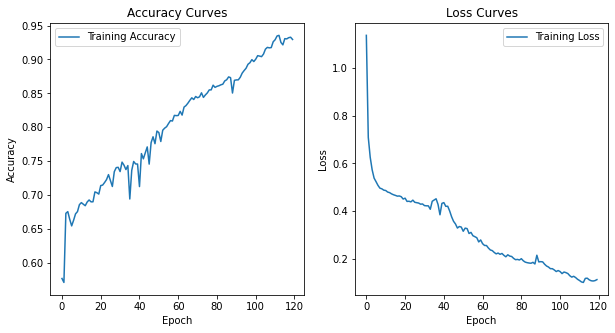

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
print(history.history.keys())
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()




In [ ]:

model.save("/content/drive/MyDrive/Colab Notebooks/datasets/"+"unet.h5")